In [1]:
library('irr') #kappa
library('DescTools') #Lin's concordance correlation coefficient (CCC) is the concordance

Loading required package: lpSolve



In [2]:
citation('DescTools')


To cite package 'DescTools' in publications use:

  Andri Signorell et mult. al. (2021). DescTools: Tools for descriptive
  statistics. R package version 0.99.41.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {{DescTools}: Tools for Descriptive Statistics},
    author = {Signorell {Andri et mult. al.}},
    year = {2021},
    note = {R package version 0.99.41},
    url = {https://cran.r-project.org/package=DescTools},
  }


In [3]:
li_cont_T = c('CombPecks','Injuries','Pododermatitis')
li_cat_T = c('Diarrhea', 'Bumblefoot','HasBumblefoot','GeneralToe')
li_cont_F = c('Feathers','NeckFeather', 'BreastFeather', 'CloacaFeather', 'BackFeather', 'WingFeather','TailFeather')

# Toes - Inter

In [4]:
#download data
path_analysis = "G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/HA"
df = read.csv(file.path(path_analysis,"df_HA_T_inter_pivot.csv"),  header = TRUE, sep = ";")
str(df)

#create a file to register data
sink(file.path(path_analysis,'ToesRealiabilityInter.txt'))

#continuous data
for (var in li_cont_T){
    cat(paste0('\n-----------------',var), file=file.path(path_analysis,'ToesRealiabilityInter.txt'), append=TRUE)
    cat(paste0('\n------------- CCC'), file=file.path(path_analysis,'ToesRealiabilityInter.txt'), append=TRUE)
    capture.output(CCC(x=subset(df, df$HAvariable==var)[['C']], 
                       y=subset(df, df$HAvariable==var)[['M']], ci = "z-transform", conf.level = 0.95, na.rm = FALSE)$rho.c,
                   file=file.path(path_analysis,'ToesRealiabilityInter.txt'), append=TRUE)}

#categorical/binary data
for (var in li_cat_T){
    cat(paste0('\n-----------------',var),file=file.path(path_analysis,'ToesRealiabilityInter.txt'), append=TRUE)
    df_ = data.frame(data.frame(subset(df, df$HAvariable==var)[['M']]),
                     data.frame(subset(df, df$HAvariable==var)[['C']]))
    capture.output(kappa2(df_[,c(1,2)], "unweighted"), 
                   file=file.path(path_analysis,'ToesRealiabilityInter.txt'), append=TRUE)}

'data.frame':	2074 obs. of  4 variables:
 $ ID4Rea    : Factor w/ 300 levels "pen10_HA2_18orange_1",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ C         : num  0 0 50 40 15 10 25 10 25 25 ...
 $ M         : num  0 0 50 50 50 25 25 0 10 0 ...
 $ HAvariable: Factor w/ 7 levels "Bumblefoot","CombPecks",..: 2 2 2 2 2 2 2 2 2 2 ...


# Toes - Intra

In [5]:
#download data
path_analysis = "G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/HA"
df = read.csv(file.path(path_analysis,"df_HA_T_intra_pivot.csv"),  header = TRUE, sep = ";")
str(df)

#create a file to register data
sink(file.path(path_analysis,'ToesRealiabilityIntra.txt'))

#continuous data with ICC & CCC
for (person in unique(df[['Person_toe']])){
    #print(person)
    if (is.na(person)==FALSE){
        cat(paste0('\n--------------------------------------------------', person),
            file=file.path(path_analysis,'ToesRealiabilityIntra.txt'), append=TRUE)
        
        #continuous data with CCC
        for (var in li_cont_T){
            #print(var)
            cat(paste0('\n-----------------',var), file=file.path(path_analysis,'ToesRealiabilityIntra.txt'), append=TRUE)
            x=subset(df, (df$HAvariable==var) & (df$Person_toe==person))[['X1.0']]
            y=subset(df, (df$HAvariable==var) & (df$Person_toe==person))[['X2.0']]
            cat(paste0('\n------------ CCC'), file=file.path(path_analysis,'ToesRealiabilityIntra.txt'), append=TRUE)            
            capture.output(CCC(x=x, y=y, ci="z-transform", conf.level=0.95, na.rm=FALSE)$rho.c,
                       file=file.path(path_analysis,'ToesRealiabilityIntra.txt'), append=TRUE)}
            
        #categorical/binary data 
        for (var in li_cat_T){
            cat(paste0('\n-----------------',var),file=file.path(path_analysis,'ToesRealiabilityIntra.txt'), append=TRUE)
            df_ = data.frame(data.frame(subset(df, (df$HAvariable==var) & (df$Person_toe==person))[['X1.0']]),
                             data.frame(subset(df, (df$HAvariable==var) & (df$Person_toe==person))[['X2.0']]))
            capture.output(kappa2(df_[,c(1,2)], "unweighted"), 
                           file=file.path(path_analysis,'ToesRealiabilityIntra.txt'), append=TRUE)
        }}}

'data.frame':	2076 obs. of  5 variables:
 $ ID4Rea    : Factor w/ 150 levels "pen10_HA2_18orange",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ Person_toe: Factor w/ 2 levels "C","M": 1 2 1 2 1 2 1 2 1 2 ...
 $ X1.0      : num  0 0 50 50 15 50 25 25 25 10 ...
 $ X2.0      : num  0 0 40 50 10 25 10 0 25 0 ...
 $ HAvariable: Factor w/ 7 levels "Bumblefoot","CombPecks",..: 2 2 2 2 2 2 2 2 2 2 ...


# Feather - Inter

In [6]:
#download data
path_analysis = "G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/HA"
df = read.csv(file.path(path_analysis,"df_HA_F_inter_pivot.csv"), header = TRUE, sep = ";")
str(df)

#create a file to register data
sink(file.path(path_analysis,'FeathersRealiabilityInter.txt'))

#continuous data
for (var in li_cont_F){
    cat(paste0('\n-----------------',var), file=file.path(path_analysis,'FeathersRealiabilityInter.txt'), append=TRUE)
    cat(paste0('\n------------- CCC'), file=file.path(path_analysis,'FeathersRealiabilityInter.txt'), append=TRUE)
    capture.output(CCC(x=subset(df, df$HAvariable==var)[['sabine']], 
                       y=subset(df, df$HAvariable==var)[['satar']], ci = "z-transform", conf.level = 0.95, na.rm = FALSE)$rho.c,
                   file=file.path(path_analysis,'FeathersRealiabilityInter.txt'), append=TRUE)}

'data.frame':	1645 obs. of  4 variables:
 $ ID4Rea    : Factor w/ 235 levels "pen10_HA2_18orange_1",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ sabine    : num  100 100 90.7 96.3 99.3 ...
 $ satar     : num  99.3 100 100 100 100 ...
 $ HAvariable: Factor w/ 7 levels "BackFeather",..: 4 4 4 4 4 4 4 4 4 4 ...


# Feather - Intra

In [7]:
#download data
path_analysis = "G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/HA"
df = read.csv(file.path(path_analysis,"df_HA_F_intra_pivot.csv"),  header = TRUE, sep = ";")
str(df)

#create a file to register data
sink(file.path(path_analysis,'FeatherRealiabilityIntra.txt'))

#continuous data with CCC
for (person in unique(df[['Person_feather']])){
    #print(person)
    if (is.na(person)==FALSE){
        cat(paste0('\n--------------------------------------------------', person),
            file=file.path(path_analysis,'FeatherRealiabilityIntra.txt'), append=TRUE)
        
        #continuous data with CCC
        for (var in li_cont_F){
            #print(var)
            cat(paste0('\n-----------------',var), file=file.path(path_analysis,'FeatherRealiabilityIntra.txt'), append=TRUE)
            x=subset(df, (df$HAvariable==var) & (df$Person_feather==person))[['X1.0']]
            y=subset(df, (df$HAvariable==var) & (df$Person_feather==person))[['X2.0']]
            cat(paste0('------------ CCC'), file=file.path(path_analysis,'FeatherRealiabilityIntra.txt'), append=TRUE)            
            capture.output(CCC(x=x, y=y, ci="z-transform", conf.level=0.95, na.rm=FALSE)$rho.c,
                       file=file.path(path_analysis,'FeatherRealiabilityIntra.txt'), append=TRUE)
        }}}

'data.frame':	1645 obs. of  6 variables:
 $ ID4Rea        : Factor w/ 118 levels "pen10_HA2_18orange",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ HAID          : Factor w/ 4 levels "HA2","HA3","HA4",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ Person_feather: Factor w/ 2 levels "sabine","satar": 1 2 1 2 1 2 1 2 1 2 ...
 $ X1.0          : num  100 99.3 90.7 100 99.3 ...
 $ X2.0          : num  100 100 96.3 100 100 ...
 $ HAvariable    : Factor w/ 7 levels "BackFeather",..: 4 4 4 4 4 4 4 4 4 4 ...


df = as.data.frame(CCC(x=x, y=y, ci="z-transform", conf.level=0.95, na.rm=FALSE)$rho.c, col.names = names(x), stringsAsFactors = FALSE)
df = as.data.frame(c(''))
df_ = as.data.frame(CCC(x=x, y=y, ci="z-transform", conf.level=0.95, na.rm=FALSE)$rho.c, col.names = names(x), stringsAsFactors = FALSE)
df = rbind(df, df_)
df

In [ ]:
#nn parametric:

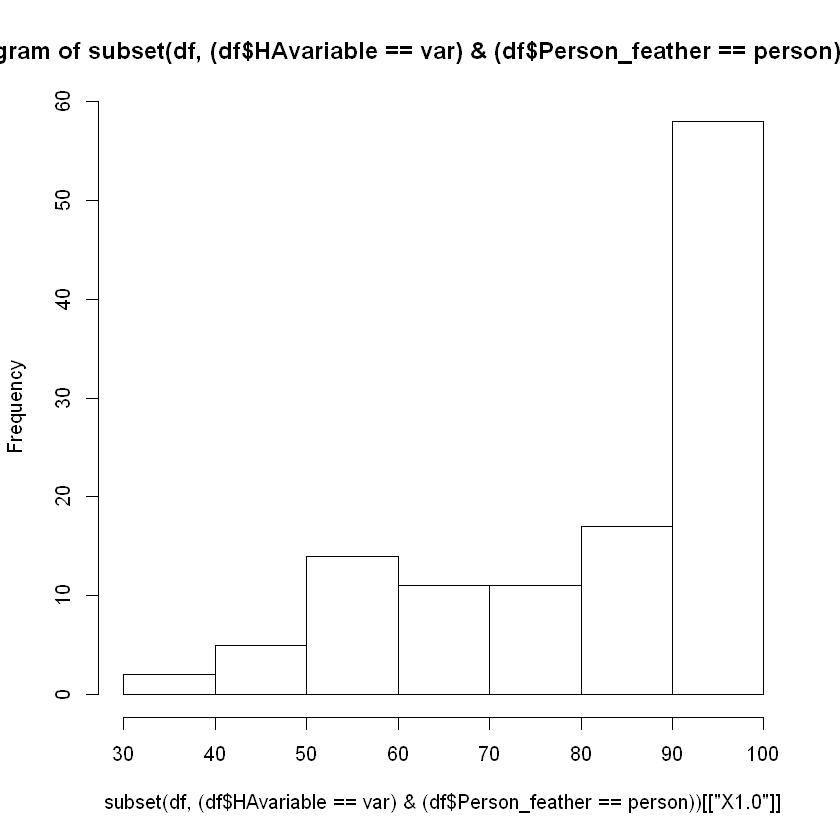

In [9]:
hist(subset(df, (df$HAvariable==var) & (df$Person_feather==person))[['X1.0']])

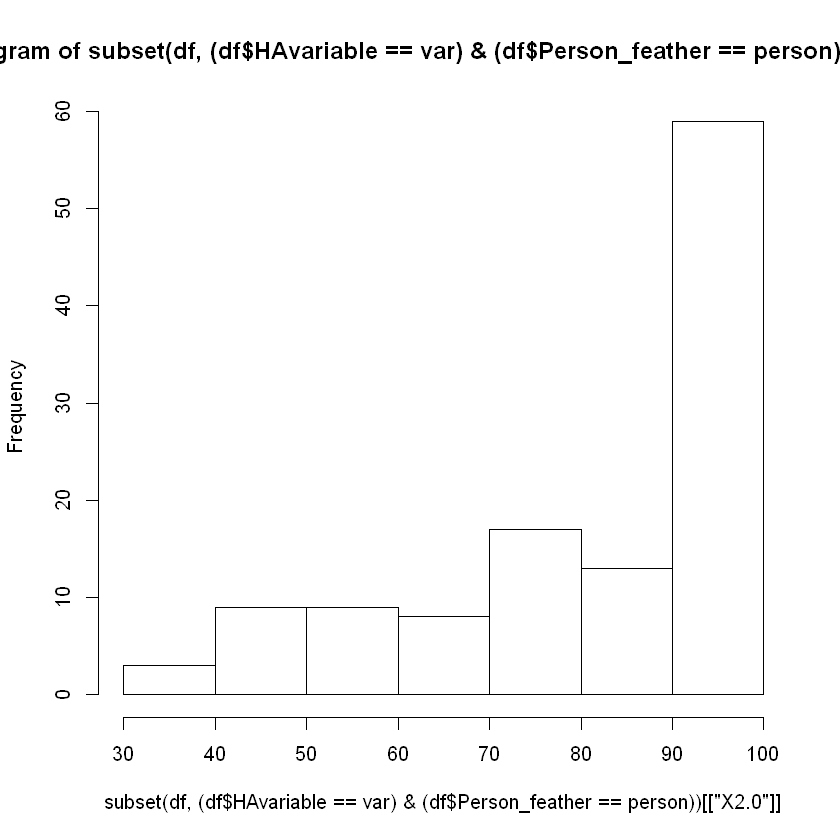

In [10]:
hist(subset(df, (df$HAvariable==var) & (df$Person_feather==person))[['X2.0']])